<a href="https://colab.research.google.com/github/Joelzr01/Aprendizaje-No-Supervisado/blob/main/kmeans_jz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

# Damos acceso a nuestro Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive'

# Google colab tools

# Instalar dependendias

In [2]:
# !pip install sklearn

# K-Means

# Cómo importar las librerías


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IA/Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.shape

(200, 5)

In [8]:
np.shape(X)

(200, 2)

# Método del codo para averiguar el número óptimo de clusters

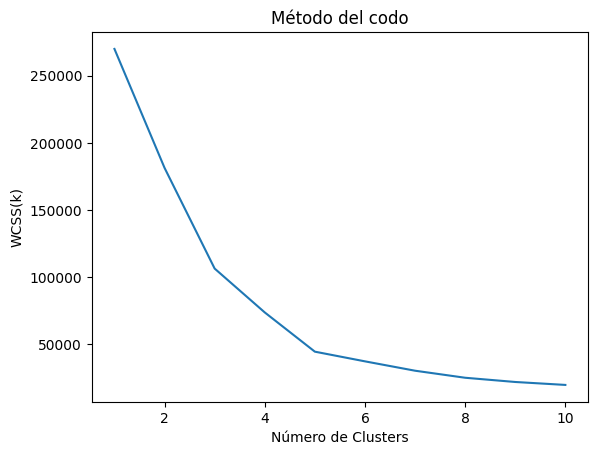

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#print (wcss)

plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

# Aplicar el método de k-means para segmentar el data set

In [10]:
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [11]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

## Aplicar el método de k-medoids para segmentar el data set

# Visualización de los clusters

In [12]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [13]:
X[0,1]

39

In [14]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

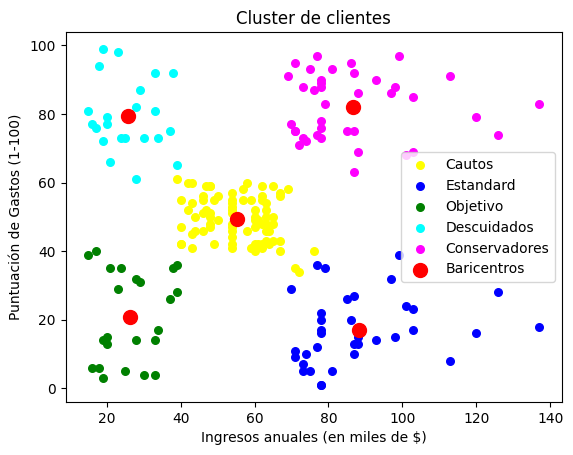

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = "yellow", label = "Cautos")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = "blue", label = "Estandard")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = "green", label = "Objetivo")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = "cyan", label = "Descuidados")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = "magenta", label = "Conservadores")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = "red", label = "Baricentros")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()

In [16]:
kmeans.predict([[15,100]])

array([3], dtype=int32)

#K-medoids

In [17]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00


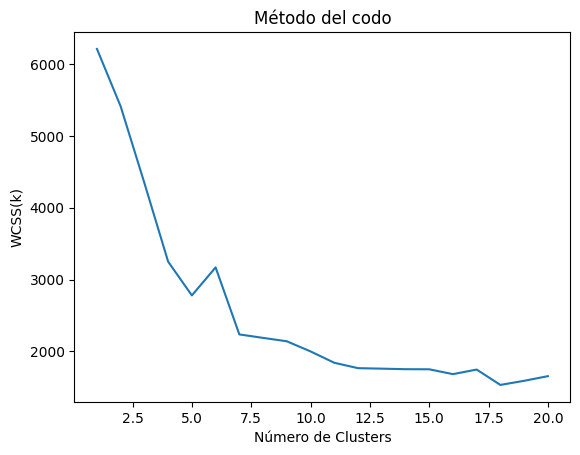

In [18]:
from sklearn_extra.cluster import KMedoids
wcss = []
for i in range(1, 21):
    kmedoids = KMedoids(n_clusters = i,random_state = 0)
    kmedoids.fit(X)
    wcss.append(kmedoids.inertia_)

#print (wcss)

plt.plot(range(1,21), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [21]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters = 5, random_state = 0)
y_kmedoids = kmedoids.fit_predict(X)

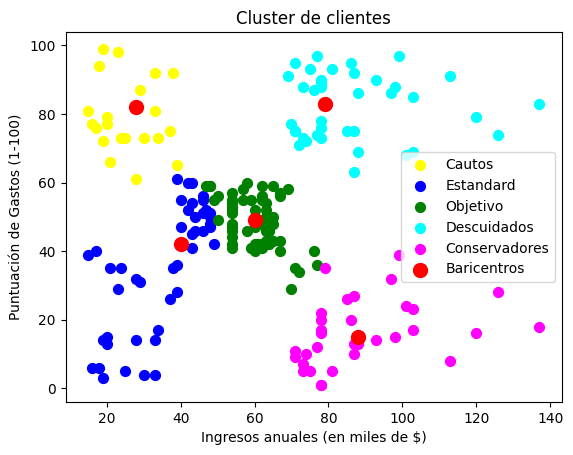

In [22]:
plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s = 50, c = "yellow", label = "Cautos")
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s = 50, c = "blue", label = "Estandard")
plt.scatter(X[y_kmedoids == 2, 0], X[y_kmedoids == 2, 1], s = 50, c = "green", label = "Objetivo")
plt.scatter(X[y_kmedoids == 3, 0], X[y_kmedoids == 3, 1], s = 50, c = "cyan", label = "Descuidados")
plt.scatter(X[y_kmedoids == 4, 0], X[y_kmedoids == 4, 1], s = 50, c = "magenta", label = "Conservadores")
#plt.scatter(X[y_kmedoids == 5, 0], X[y_kmedoids == 5, 1], s = 50, c = "green", label = "Objetivo")
#plt.scatter(X[y_kmedoids == 6, 0], X[y_kmedoids == 6, 1], s = 50, c = "cyan", label = "Descuidados")
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], s = 100, c = "red", label = "Baricentros")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()